In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	12
float64		column 3	30
float64		column 4	25
float64		column 5	12
float64		column 6	31
float64		column 7	18
float64		column 8	31
float64		column 9	6
float64		column 10	24
float64		column 11	24
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,388.000000,370.000000,375.000000,388.000000,369.000000,382.000000,369.000000,394.000000,376.000000,376.000000,394.000000
mean,-0.100319,0.074512,2.021479,1.907913,1.934802,1.985377,2.003666,1.984845,1.957804,2.040125,1.965539,1.966179
std,2.564450,2.787263,1.142544,1.124142,1.164422,1.142178,1.164159,1.136625,1.144942,1.158775,1.168835,1.191514
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.013093,0.007019,0.067105,0.006786,0.001972
25%,-0.694850,-0.828385,1.114775,0.958600,0.879365,0.993930,0.957040,1.020300,0.992088,1.039925,0.880387,0.931072
50%,-0.068013,0.050280,2.059000,1.819600,1.891700,2.045000,2.080550,2.027100,2.067200,2.114850,1.945700,1.925400
75%,0.763967,0.918948,2.986700,2.795300,2.964400,2.966400,2.954275,3.012600,2.920850,3.042800,2.968700,3.008675
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.994400,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

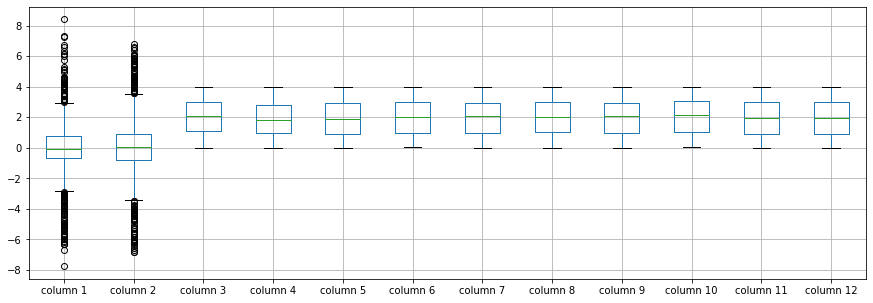

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.074512
column 3     2.021479
column 4     1.907913
column 5     1.934802
column 6     1.985377
column 7     2.003666
column 8     1.984845
column 9     1.957804
column 10    2.040125
column 11    1.965539
column 12    1.966179
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.012547,-0.048924,-0.070823,0.004756,-0.007437,-0.035918,0.000443,-0.018213,0.044721,0.073618,-0.038633
column 2,0.012547,1.000000,-0.066469,0.040673,-0.083303,-0.057592,0.032056,-0.036003,-0.017605,0.026935,-0.021889,0.055014
column 3,-0.048924,-0.066469,1.000000,0.039293,0.006286,-0.071208,-0.108450,0.087987,0.112636,-0.033039,-0.064556,0.010354
column 4,-0.070823,0.040673,0.039293,1.000000,-0.038697,0.072722,-0.029016,0.086391,0.012057,0.068738,-0.020669,-0.042647
column 5,0.004756,-0.083303,0.006286,-0.038697,1.000000,0.058396,0.015365,0.013309,-0.009544,0.018642,0.015290,-0.033491
column 6,-0.007437,-0.057592,-0.071208,0.072722,0.058396,1.000000,-0.018307,0.054751,-0.005262,-0.002442,0.007820,-0.083542
column 7,-0.035918,0.032056,-0.108450,-0.029016,0.015365,-0.018307,1.000000,-0.040960,0.078018,0.052689,0.036939,-0.059350
column 8,0.000443,-0.036003,0.087987,0.086391,0.013309,0.054751,-0.040960,1.000000,0.071271,-0.130690,-0.068591,-0.025879
column 9,-0.018213,-0.017605,0.112636,0.012057,-0.009544,-0.005262,0.078018,0.071271,1.000000,0.019313,0.009381,0.049107
column 10,0.044721,0.026935,-0.033039,0.068738,0.018642,-0.002442,0.052689,-0.130690,0.019313,1.000000,0.021066,0.027351


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+20,12+20+20,12+20+20+20,12+20+20+20+20,12+20+20+20+20+20,12+20+20+20+20+20+20,12+20+20+20+20+20,12+20+20+20+20,12+20+20+20,12+20+20,12+20,12], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.71168960571289
Epoch: 1 , loss: 26.650573043823243
Epoch: 2 , loss: 26.592051544189452
Epoch: 3 , loss: 26.542143402099608
Epoch: 4 , loss: 26.512517852783205
Epoch: 5 , loss: 26.44953758239746
Epoch: 6 , loss: 26.318318252563476
Epoch: 7 , loss: 26.170080032348633
Epoch: 8 , loss: 25.627608184814452
Epoch: 9 , loss: 23.903290939331054
Epoch: 10 , loss: 21.83289894104004
Epoch: 11 , loss: 20.757580795288085
Epoch: 12 , loss: 20.62385551452637
Epoch: 13 , loss: 20.383026275634766
Epoch: 14 , loss: 19.620395736694334
Epoch: 15 , loss: 19.884929962158203
Epoch: 16 , loss: 19.548622817993163
Epoch: 17 , loss: 19.56739356994629
Epoch: 18 , loss: 19.539608612060547
Epoch: 19 , loss: 19.625459289550783
Epoch: 20 , loss: 19.12707077026367
Epoch: 21 , loss: 19.42002212524414
Epoch: 22 , loss: 19.180286483764647
Epoch: 23 , loss: 19.083460845947265
Epoch: 24 , loss: 19.253653106689452
Epoch: 25 , loss: 19.027

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.169203813101078, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.1357787506624579

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     1.133900
column 4     1.187200
column 5     3.956600
column 6     1.117997
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    1.142958
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AG_5(imp).xlsx", index=False, header=False)